# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
file_path = 'icml_face_data.csv'  # Thay bằng đường dẫn thực tế tới file của bạn


In [5]:
def read_dataset(file_path):
    df = pd.read_csv(file_path)
    display(df)
    return df

In [6]:
# Đọc file CSV
df = read_dataset(file_path)

# Hiển thị vài dòng dữ liệu đầu tiên
print(df.head())

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [8]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [9]:
## parsing data here
images, labels = parse_data(df)

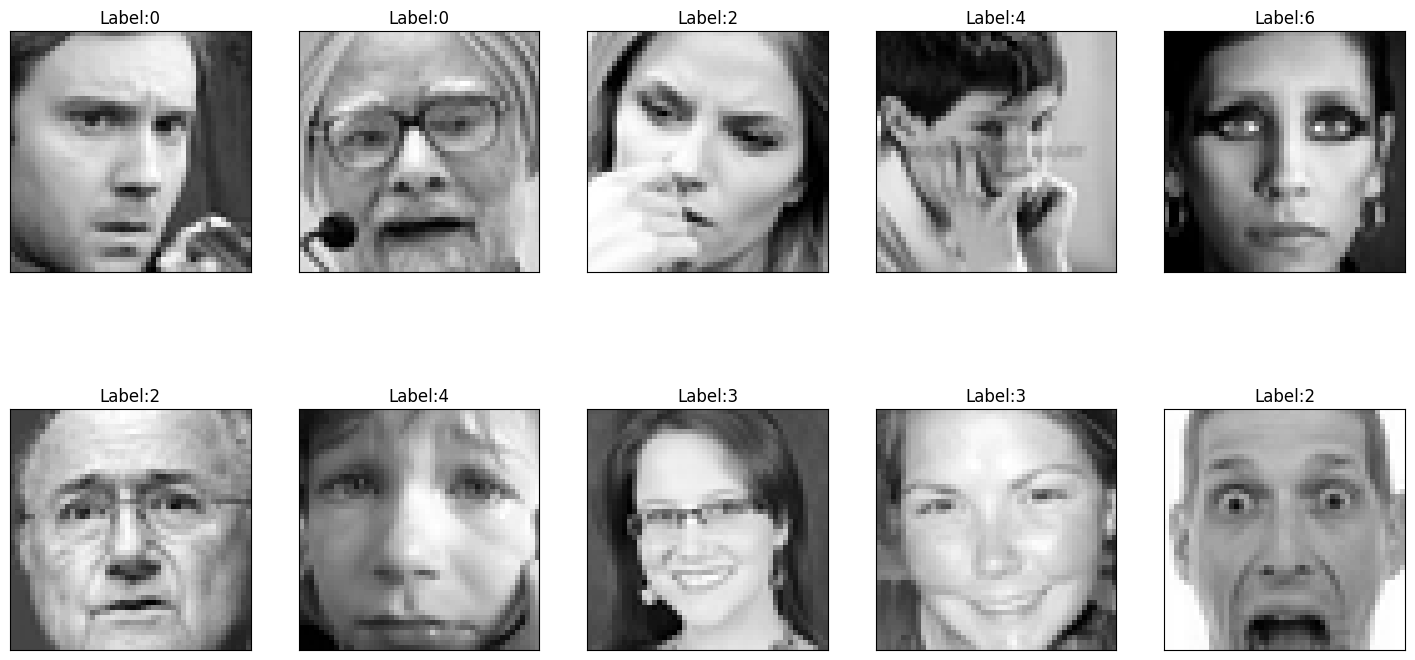

In [10]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

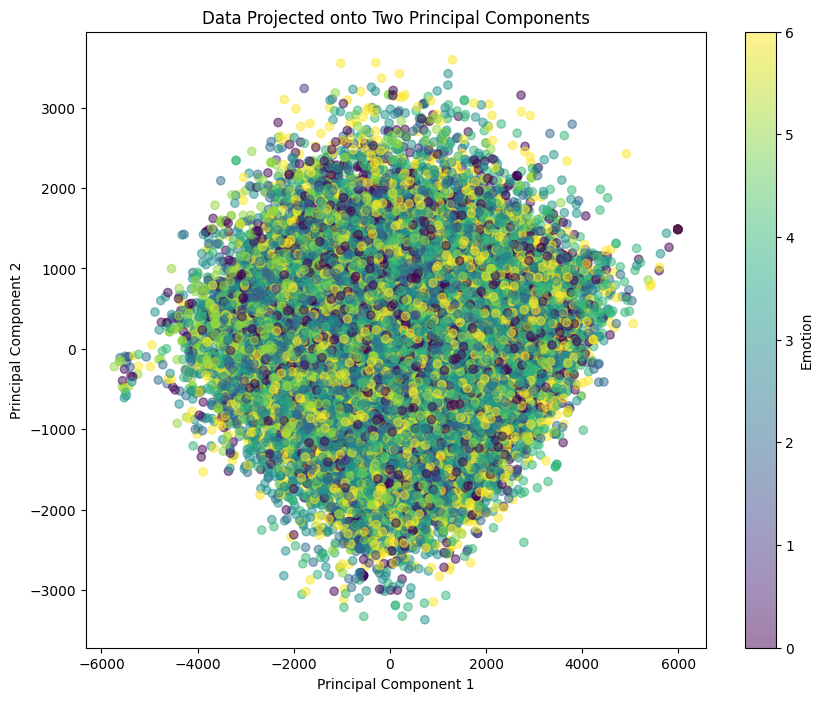

In [11]:
from sklearn.decomposition import PCA
# Chuyển đổi dữ liệu
images, labels = parse_data(df)

# Chuyển đổi dữ liệu ảnh thành dạng phẳng
images_flattened = images.reshape(images.shape[0], -1)

# Thực hiện PCA với 2 thành phần chính
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_flattened)

# Trực quan hóa dữ liệu trên hai thành phần chính đầu tiên
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(7), label='Emotion')
plt.title('Data Projected onto Two Principal Components')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

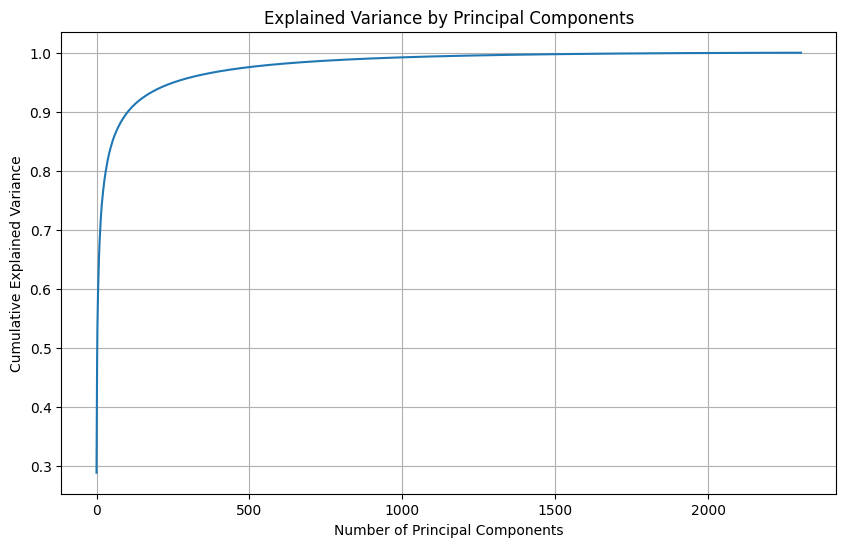

The optimal number of principal components is 255


In [12]:
# Thực hiện PCA không giới hạn số lượng thành phần chính
pca = PCA()
pca.fit(images_flattened)

# Tính toán tỉ lệ phương sai giải thích
explained_variance_ratio = pca.explained_variance_ratio_

# Vẽ biểu đồ tỉ lệ phương sai giải thích
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Xác định số lượng thành phần chính tối ưu
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'The optimal number of principal components is {optimal_components}')


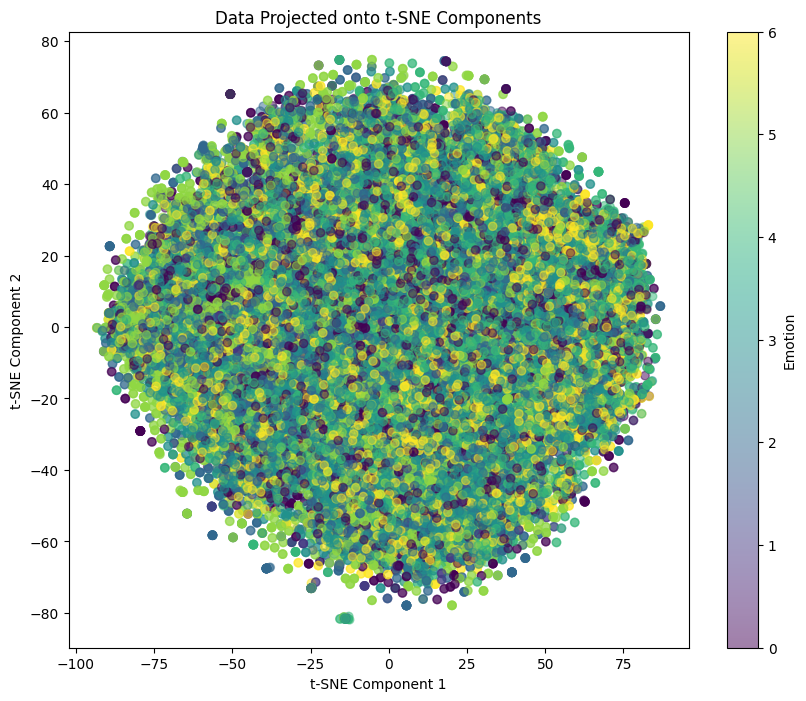

In [13]:
from sklearn.manifold import TSNE

# Thực hiện t-SNE
tsne = TSNE(n_components=2, random_state=42)
images_tsne = tsne.fit_transform(images_flattened)

# Trực quan hóa dữ liệu sau khi t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(7), label='Emotion')
plt.title('Data Projected onto t-SNE Components')
plt.show()


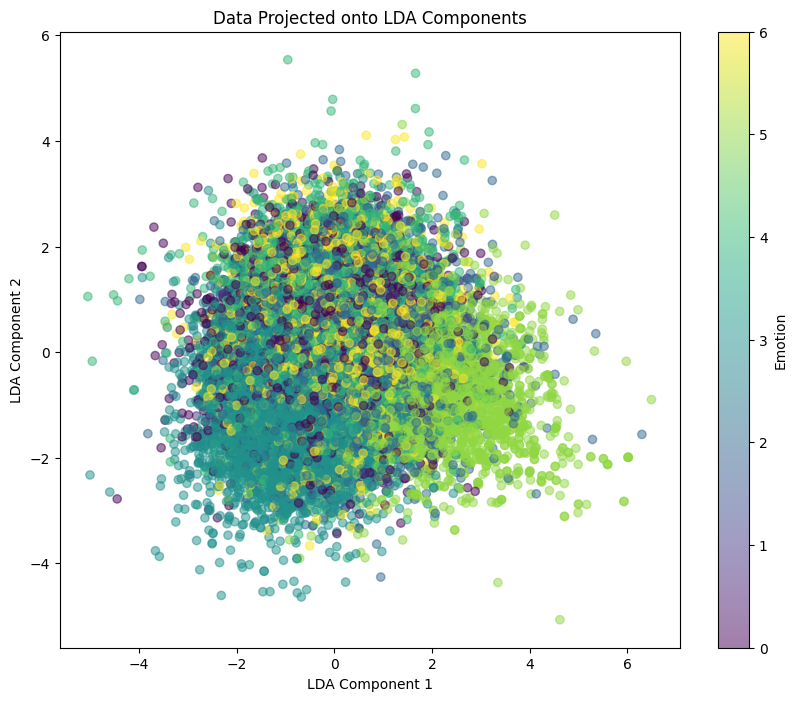

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Thực hiện LDA
lda = LDA(n_components=2)
images_lda = lda.fit_transform(images_flattened, labels)

# Trực quan hóa dữ liệu sau khi LDA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_lda[:, 0], images_lda[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(scatter, ticks=range(7), label='Emotion')
plt.title('Data Projected onto LDA Components')
plt.show()


## 3. Image Classification


The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [15]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện, tập xác nhận và tập kiểm tra
X_train, X_temp, y_train, y_temp = train_test_split(images_flattened, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [16]:
from sklearn.manifold import TSNE

# Thực hiện t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_val_tsne = tsne.fit_transform(X_val)
X_test_tsne = tsne.fit_transform(X_test)


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Thực hiện LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.fit_transform(X_val, y_val)
X_test_lda = lda.fit_transform(X_test, y_test)


In [18]:
# Thực hiện PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [19]:
# Danh sách các mô hình
models = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=300)
}

In [20]:
# Huấn luyện và đánh giá mô hình trên dữ liệu gốc
print("Original Data:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"\n{name} Model")
    print(classification_report(y_val, y_pred))

Original Data:

SVM Model
              precision    recall  f1-score   support

           0       0.40      0.21      0.28       733
           1       1.00      0.06      0.11        87
           2       0.42      0.24      0.31       804
           3       0.49      0.73      0.58      1379
           4       0.32      0.39      0.35       887
           5       0.59      0.48      0.53       587
           6       0.40      0.39      0.39       906

    accuracy                           0.44      5383
   macro avg       0.52      0.36      0.36      5383
weighted avg       0.44      0.44      0.42      5383


RandomForest Model
              precision    recall  f1-score   support

           0       0.45      0.21      0.29       733
           1       1.00      0.25      0.40        87
           2       0.47      0.26      0.34       804
           3       0.45      0.74      0.56      1379
           4       0.34      0.36      0.35       887
           5       0.65      0.5

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Huấn luyện và đánh giá mô hình trên dữ liệu PCA
print("\n\nData Transformed with PCA:")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_val_pca)
    print(f"\n{name} Model")
    print(classification_report(y_val, y_pred))



Data Transformed with PCA:

SVM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       733
           1       0.00      0.00      0.00        87
           2       0.09      0.00      0.00       804
           3       0.26      0.87      0.41      1379
           4       0.27      0.12      0.16       887
           5       0.22      0.16      0.18       587
           6       0.33      0.01      0.02       906

    accuracy                           0.26      5383
   macro avg       0.17      0.17      0.11      5383
weighted avg       0.21      0.26      0.15      5383



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



RandomForest Model
              precision    recall  f1-score   support

           0       0.21      0.19      0.20       733
           1       0.43      0.21      0.28        87
           2       0.25      0.22      0.23       804
           3       0.30      0.37      0.33      1379
           4       0.22      0.21      0.21       887
           5       0.34      0.32      0.33       587
           6       0.23      0.23      0.23       906

    accuracy                           0.26      5383
   macro avg       0.28      0.25      0.26      5383
weighted avg       0.26      0.26      0.26      5383


KNN Model
              precision    recall  f1-score   support

           0       0.18      0.26      0.22       733
           1       0.12      0.07      0.09        87
           2       0.18      0.18      0.18       804
           3       0.29      0.34      0.31      1379
           4       0.20      0.17      0.19       887
           5       0.25      0.20      0.22    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Huấn luyện và đánh giá mô hình trên dữ liệu t-SNE
print("\n\nData Transformed with t-SNE:")
for name, model in models.items():
    model.fit(X_train_tsne, y_train)
    y_pred = model.predict(X_val_tsne)
    print(f"\n{name} Model")
    print(classification_report(y_val, y_pred))



Data Transformed with t-SNE:

SVM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       733
           1       0.00      0.00      0.00        87
           2       0.00      0.00      0.00       804
           3       0.26      1.00      0.41      1379
           4       0.00      0.00      0.00       887
           5       0.17      0.00      0.01       587
           6       0.00      0.00      0.00       906

    accuracy                           0.26      5383
   macro avg       0.06      0.14      0.06      5383
weighted avg       0.08      0.26      0.11      5383



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



RandomForest Model
              precision    recall  f1-score   support

           0       0.13      0.12      0.12       733
           1       0.00      0.00      0.00        87
           2       0.15      0.15      0.15       804
           3       0.26      0.33      0.29      1379
           4       0.15      0.15      0.15       887
           5       0.16      0.12      0.14       587
           6       0.16      0.15      0.15       906

    accuracy                           0.19      5383
   macro avg       0.15      0.14      0.14      5383
weighted avg       0.18      0.19      0.18      5383


KNN Model
              precision    recall  f1-score   support

           0       0.14      0.17      0.15       733
           1       0.03      0.02      0.02        87
           2       0.15      0.15      0.15       804
           3       0.26      0.32      0.29      1379
           4       0.15      0.13      0.14       887
           5       0.14      0.12      0.13    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Huấn luyện và đánh giá mô hình trên dữ liệu LDA
print("\n\nData Transformed with LDA:")
for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_val_lda)
    print(f"\n{name} Model")
    print(classification_report(y_val, y_pred))



Data Transformed with LDA:

SVM Model
              precision    recall  f1-score   support

           0       0.20      0.00      0.01       733
           1       0.00      0.00      0.00        87
           2       0.48      0.05      0.09       804
           3       0.57      0.90      0.70      1379
           4       0.29      0.57      0.39       887
           5       0.68      0.90      0.77       587
           6       0.29      0.20      0.24       906

    accuracy                           0.46      5383
   macro avg       0.36      0.37      0.31      5383
weighted avg       0.42      0.46      0.38      5383



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



RandomForest Model
              precision    recall  f1-score   support

           0       0.19      0.16      0.17       733
           1       0.04      0.01      0.02        87
           2       0.22      0.16      0.19       804
           3       0.61      0.74      0.67      1379
           4       0.26      0.29      0.28       887
           5       0.66      0.81      0.73       587
           6       0.25      0.22      0.23       906

    accuracy                           0.41      5383
   macro avg       0.32      0.34      0.33      5383
weighted avg       0.37      0.41      0.39      5383


KNN Model
              precision    recall  f1-score   support

           0       0.18      0.22      0.19       733
           1       0.00      0.00      0.00        87
           2       0.26      0.20      0.23       804
           3       0.60      0.73      0.66      1379
           4       0.25      0.25      0.25       887
           5       0.70      0.79      0.74    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Danh sách các mô hình
models = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=300)
}

# Thiết lập các tham số cần tuning
param_grid = {
    'SVM': {
        'pca__n_components': [2, 5, 10], 
        'model__C': [0.1, 1, 10], 
        'model__gamma': [1, 0.1, 0.01]
    },
    'RandomForest': {
        'pca__n_components': [2, 5, 10], 
        'model__n_estimators': [10, 50, 100]
    },
    'KNN': {
        'pca__n_components': [2, 5, 10], 
        'model__n_neighbors': [3, 5, 7]
    },
    'MLP': {
        'pca__n_components': [2, 5, 10], 
        'model__hidden_layer_sizes': [(50,), (100,), (50, 50)], 
        'model__activation': ['tanh', 'relu']
    }
}

# Định nghĩa dictionary để lưu kết quả
results = {}

# GridSearchCV để tìm siêu tham số tốt nhất và đánh giá mô hình
for name, model in models.items():
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])
    clf = GridSearchCV(pipeline, param_grid[name], cv=3)
    clf.fit(X_train, y_train)
    
    best_params = clf.best_params_
    y_pred = clf.predict(X_val)
    
    # Lưu kết quả vào dictionary
    results[name] = {
        'best_params': best_params,
        'y_pred': y_pred
    }
    
    print(f"\nBest parameters for {name}: {best_params}")
    print(classification_report(y_val, y_pred))


Best parameters for SVM: {'model__C': 1, 'model__gamma': 0.01, 'pca__n_components': 5}
              precision    recall  f1-score   support

           0       0.91      0.07      0.12       733
           1       1.00      0.21      0.34        87
           2       0.86      0.07      0.14       804
           3       0.27      1.00      0.43      1379
           4       0.90      0.03      0.06       887
           5       0.97      0.21      0.35       587
           6       0.94      0.04      0.07       906

    accuracy                           0.31      5383
   macro avg       0.84      0.23      0.22      5383
weighted avg       0.75      0.31      0.21      5383


Best parameters for RandomForest: {'model__n_estimators': 100, 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.39      0.25      0.30       733
           1       0.96      0.28      0.43        87
           2       0.50      0.28      0.36       804
         

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)




Best parameters for SVM: {'model__C': 1, 'model__gamma': 0.01, 'pca__n_components': 5}
              precision    recall  f1-score   support

           0       0.91      0.07      0.12       733
           1       1.00      0.21      0.34        87
           2       0.86      0.07      0.14       804
           3       0.27      1.00      0.43      1379
           4       0.90      0.03      0.06       887
           5       0.97      0.21      0.35       587
           6       0.94      0.04      0.07       906

    accuracy                           0.31      5383
   macro avg       0.84      0.23      0.22      5383
weighted avg       0.75      0.31      0.21      5383



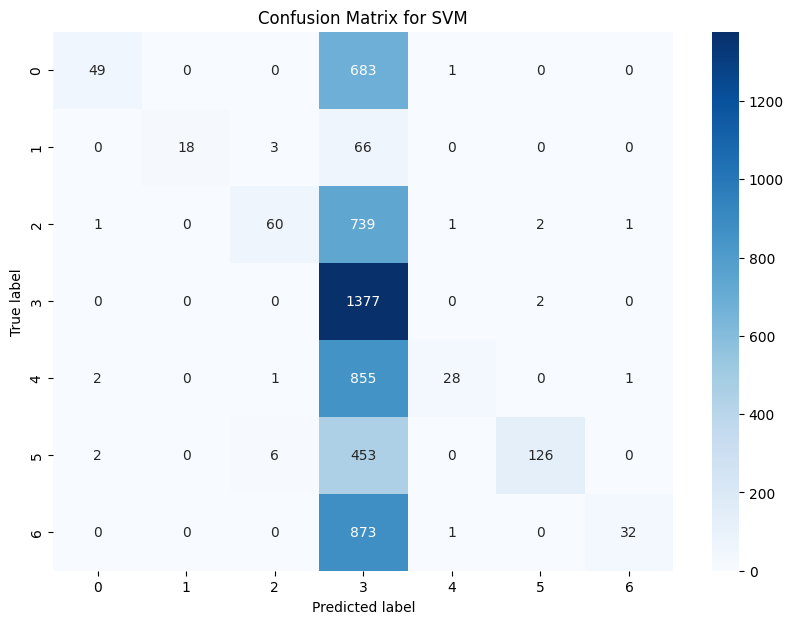

Accuracy per class for SVM: [0.06684857 0.20689655 0.07462687 0.99854967 0.03156708 0.21465077
 0.03532009]
Class with most correct predictions for SVM: 3
Class with least correct predictions for SVM: 4

Best parameters for RandomForest: {'model__n_estimators': 100, 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.39      0.25      0.30       733
           1       0.96      0.28      0.43        87
           2       0.50      0.28      0.36       804
           3       0.37      0.66      0.47      1379
           4       0.33      0.30      0.32       887
           5       0.56      0.43      0.48       587
           6       0.36      0.29      0.32       906

    accuracy                           0.39      5383
   macro avg       0.49      0.35      0.38      5383
weighted avg       0.41      0.39      0.38      5383



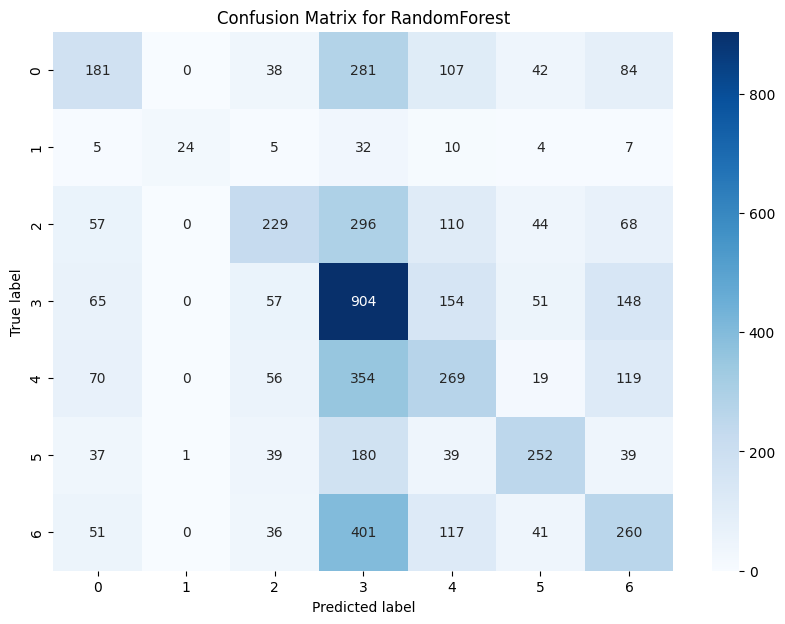

Accuracy per class for RandomForest: [0.24693042 0.27586207 0.28482587 0.6555475  0.30326945 0.42930153
 0.28697572]
Class with most correct predictions for RandomForest: 3
Class with least correct predictions for RandomForest: 0

Best parameters for KNN: {'model__n_neighbors': 5, 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.24      0.33      0.28       733
           1       0.22      0.22      0.22        87
           2       0.28      0.27      0.27       804
           3       0.34      0.41      0.37      1379
           4       0.28      0.23      0.25       887
           5       0.36      0.34      0.35       587
           6       0.28      0.20      0.23       906

    accuracy                           0.30      5383
   macro avg       0.29      0.28      0.28      5383
weighted avg       0.30      0.30      0.30      5383



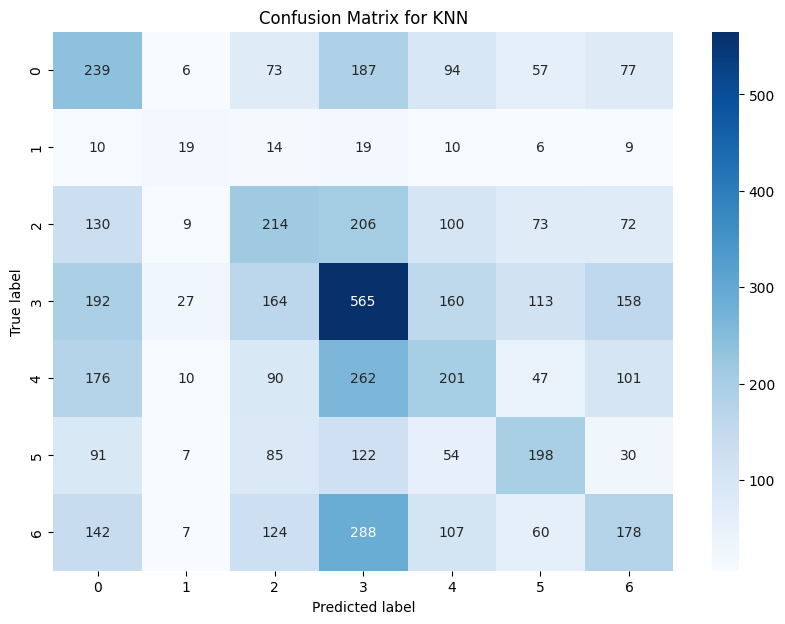

Accuracy per class for KNN: [0.3260573  0.2183908  0.26616915 0.40971719 0.22660654 0.33730835
 0.19646799]
Class with most correct predictions for KNN: 3
Class with least correct predictions for KNN: 6

Best parameters for MLP: {'model__activation': 'relu', 'model__hidden_layer_sizes': (50, 50), 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.25      0.15      0.18       733
           1       0.00      0.00      0.00        87
           2       0.22      0.08      0.12       804
           3       0.31      0.63      0.42      1379
           4       0.28      0.30      0.29       887
           5       0.28      0.27      0.27       587
           6       0.28      0.09      0.14       906

    accuracy                           0.29      5383
   macro avg       0.23      0.22      0.20      5383
weighted avg       0.27      0.29      0.25      5383



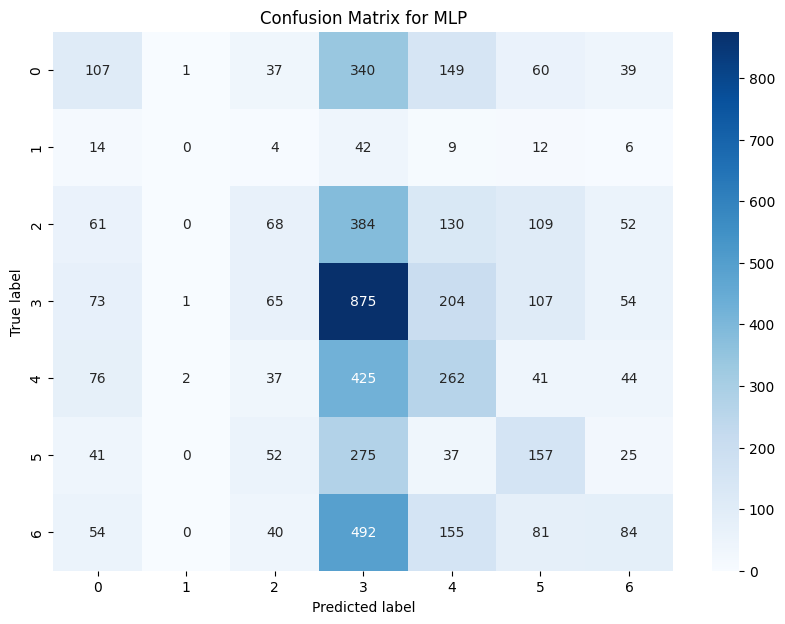

Accuracy per class for MLP: [0.14597544 0.         0.08457711 0.63451777 0.29537768 0.26746167
 0.09271523]
Class with most correct predictions for MLP: 3
Class with least correct predictions for MLP: 1


In [36]:
# Định nghĩa hàm vẽ confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Vẽ confusion matrix và phân tích kết quả
for name, result in results.items():
    y_pred = result['y_pred']
    print(f"\nBest parameters for {name}: {result['best_params']}")
    print(classification_report(y_val, y_pred))
    
    # Tạo confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cm, classes=[0, 1, 2, 3, 4, 5, 6], title=f'Confusion Matrix for {name}')
    
    # Phân tích confusion matrix
    true_positives = np.diag(cm)
    false_positives = cm.sum(axis=0) - true_positives
    false_negatives = cm.sum(axis=1) - true_positives
    accuracy_per_class = true_positives / cm.sum(axis=1)
    
    print(f"Accuracy per class for {name}: {accuracy_per_class}")
    most_correct_class = np.argmax(accuracy_per_class)
    least_correct_class = np.argmin(accuracy_per_class)
    
    print(f"Class with most correct predictions for {name}: {most_correct_class}")
    print(f"Class with least correct predictions for {name}: {least_correct_class}")


Based on the provided metrics:

Overall Accuracy: Random Forest has the highest overall accuracy at 0.39.
Precision: SVM has the highest precision (0.84 macro avg), but it comes with very low recall and F1-score.
Recall: Random Forest performs the best in terms of recall (0.35 macro avg).
F1-score: Random Forest also has the highest F1-score (0.38 macro avg).
Best Performing Model: Random Forest

Random Forest performs the best overall due to its balance across precision, recall, and F1-score, along with the highest accuracy. This model captures more true positives compared to others, which is crucial for classification tasks.
Class-wise Performance:

Most Accurate Class:
For all models, Class 3 is the most accurately predicted class, with Random Forest achieving 65.55% accuracy.
Most Errors:
SVM struggles the most with Class 4 (3.16% accuracy).
Random Forest has the most errors with Class 0 (24.69% accuracy).
KNN has the least accuracy with Class 6 (19.65% accuracy).
MLP fails completely on Class 1 (0% accuracy).
In conclusion, the Random Forest model is the best choice based on overall performance metrics, showing a good balance between precision, recall, and F1-score, and making the fewest errors relative to the other models.